## Física Computacional
# Proyecto final: Cálculo de la pendiente y orientación azimutal de un terreno a través de un modelo de elevación digital mediante el método de Evans-Young

In [1]:
from IPython.display import Image

## Modelo de elevación digital ASTER Global Digital Elevation Model (GDEM) Version 3 (ASTGTM) 
Gerado por la Administración Nacional de Aeronáutica y el Espacio (NASA) y el Ministerio de Economía, Comercio e Industria de Japón (METI) con una resolución espacial de aproximadamente $30 m$ en la región del ecuador.
(NASA/METI/AIST/Japan Spacesystems and U.S./Japan ASTER Science Team, 2019)

In [2]:
Image(url="Picture1.png", width=700)

## Simplificación de un DEM
Fuente: Hengl, Gruber and Shrestha, 2003

In [3]:
Image(url="Picture2.png", width=500)

## Métodos numéricos de Evans-Young o Sharpnack & Akin de los 8 vecinos para calcular la pendiente y la dirección azimutal
Fuente: Lee and Clarke, 2005

In [4]:
Image(url="Picture3.png", width=600)

## Métodos numéricos de Evans-Young o Sharpnack & Akin de los 8 vecinos para calcular la pendiente y la dirección azimutal

## Diferencias finitas en $x$:

## $ p=\frac{p_1+p_2+p_3}{3} =\frac{1}{3} \cdot \left[ \frac{z_9-z_7}{2w_p} + O(w_p^2) + \frac{z_6-z_4}{2w_p} + O(w_p^2) + \frac{z_3-z_1}{2w_p} + O(w_p^2)\right] $

## Diferencias finitas en $y$:

## $ q=\frac{q_1+q_2+q_3}{3} =\frac{1}{3} \cdot \left[ \frac{z_3-z_9}{2w_q} + O(w_p^2) + \frac{z_2-z_8}{2w_q} + O(w_p^2) + \frac{z_1-z_7}{2w_q} + O(w_p^2)\right] $

In [5]:
Image(url="Picture2.png", width=500)

## Pendientes del DEM
## $ G = \sqrt{p^2+q^2}$ [adimensional]
## $ G = atan( \sqrt{p^2+q^2} )$ [grados]

## Orientación azimutal
## $ A = atan \left( \frac{q}{p} \right) $  [grados]

In [6]:
Image(url="Picture4.png", width=500)
# Huisman, O. and By, R. A. (2009) Principles of geographic information systems.

# Implementación del método Evans-Young
## Se carga el DEM (raster)

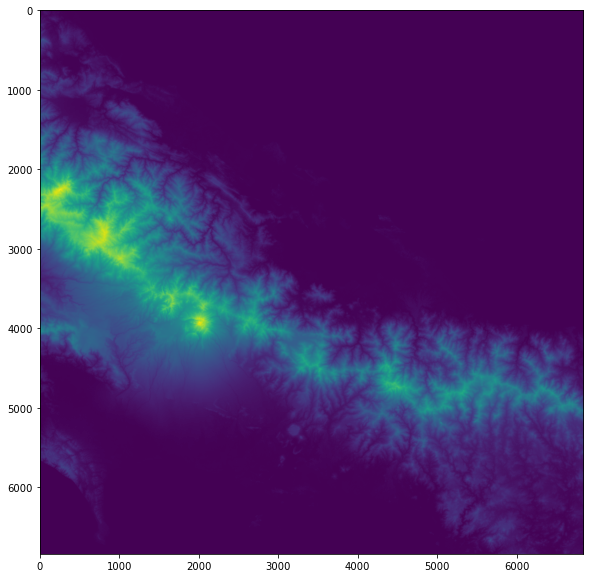

In [2]:
# https://towardsdatascience.com/reading-and-visualizing-geotiff-images-with-python-8dcca7a74510
import numpy as np
import gdal
import matplotlib.pyplot as plt
import time

dataset = gdal.Open('C:/Users/Jbati/Drive - jbatista.wk/UTP/Tesis/GIS/panama_elevations_dem_crop.tif', gdal.GA_ReadOnly)
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()

plt.figure(figsize=(10, 10))
plt.imshow(arr)
plt.show()

## Estructura del DEM

In [22]:
print('Proyección: ', dataset.GetProjection())
print('rows: ', arr.shape[0])
print('cols: ', arr.shape[1])
print('cells: ~', arr.shape[0]*arr.shape[1]/1e6, 'millones\n')

Proyección:  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
rows:  6840
cols:  6840
cells: ~ 46.7856 millones



## Implementación del algoritmos

## Aplicación a una matriz sencilla

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 2 2 2 2 2 2 2 1 0]
 [0 1 2 3 3 3 3 3 2 1 0]
 [0 1 2 3 4 4 4 3 2 1 0]
 [0 1 2 3 4 5 4 3 2 1 0]
 [0 1 2 3 4 4 4 3 2 1 0]
 [0 1 2 3 3 3 3 3 2 1 0]
 [0 1 2 2 2 2 2 2 2 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0]] 



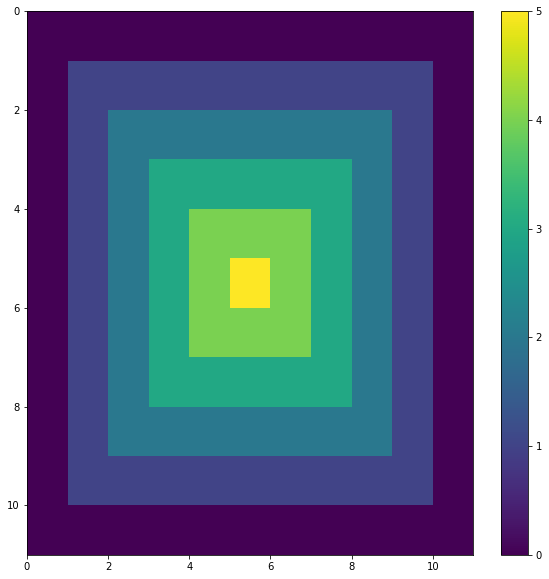

In [9]:
c = np.array([[0,0,0,0,0,0,0,0,0,0,0],
             [0,1,1,1,1,1,1,1,1,1,0],
             [0,1,2,2,2,2,2,2,2,1,0],
             [0,1,2,3,3,3,3,3,2,1,0],
             [0,1,2,3,4,4,4,3,2,1,0],
             [0,1,2,3,4,5,4,3,2,1,0],
             [0,1,2,3,4,4,4,3,2,1,0],
             [0,1,2,3,3,3,3,3,2,1,0],
             [0,1,2,2,2,2,2,2,2,1,0],
             [0,1,1,1,1,1,1,1,1,1,0],
             [0,0,0,0,0,0,0,0,0,0,0]])
print(c, '\n')
plt.figure(figsize=(10, 10))
plt.pcolormesh(c)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

## ¿Cómo funciona el ciclo/recorrido del algoritmo?

In [10]:
from PIL import Image as pilImage
import glob
 
# Create the frames
frames = []
imgs = glob.glob('PROYECTO/algoritmo_x*.jpg')
for i in imgs:
    new_frame = pilImage.open(i)
    frames.append(new_frame)

# Save into a GIF file that loops forever
frames[0].save('PROYECTO/anim_x.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=1500, loop=0)

# Create the frames
frames = []
imgs = glob.glob('PROYECTO/algoritmo_y*.jpg')
for i in imgs:
    new_frame = pilImage.open(i)
    frames.append(new_frame)

# Save into a GIF file that loops forever
frames[0].save('PROYECTO/anim_y.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=1500, loop=0)

In [11]:
Image(url='PROYECTO/anim_y.gif', width=500)

In [12]:
Image(url='PROYECTO/anim_x.gif', width=500)

In [13]:
Image(url='PROYECTO/algoritmo_fin.jpg', width=500)

## Definición de funciones

In [3]:
def get_slope_aspect(np_arr, arr_res):
    start_time = time.time()
    wx = arr_res
    wy = arr_res
    #####
    Z1 = np_arr[0:(np_arr.shape[0]-2) , 0:(np_arr.shape[1]-2)]
    Z2 = np_arr[0:(np_arr.shape[0]-2) , 1:(np_arr.shape[1]-1)]
    Z3 = np_arr[0:(np_arr.shape[0]-2) , 2:(np_arr.shape[1]-0)]
    #####
    Z4 = np_arr[1:(np_arr.shape[0]-1) , 0:(np_arr.shape[1]-2)]
    Z5 = 0
    Z6 = np_arr[1:(np_arr.shape[0]-1) , 2:(np_arr.shape[1]-0)]
    #####
    Z7 = np_arr[2:(np_arr.shape[0])   , 0:(np_arr.shape[1]-2)]
    Z8 = np_arr[2:(np_arr.shape[0])   , 1:(np_arr.shape[1]-1)]
    Z9 = np_arr[2:(np_arr.shape[0])   , 2:(np_arr.shape[1]-0)]
    #####
    P = (Z9+Z6+Z3 -Z7-Z4-Z1)/(6*wx)
    Q = (Z3+Z2+Z1 -Z9-Z8-Z7)/(6*wy)
    #####
    G = np.sqrt(P**2 + Q**2)   # G = np.round( G , 2)   # print(G, '\n')
    G = np.arctan(G)*180/np.pi   # A = np.round(A)   # print(A)
    #####
    A = np.arctan(np.abs(Q/P))   # A = np.round(A)   # print(A)
    #####  Q ~ y     P ~ x
    NE = (Q>0) * (P>0)
    SE = (Q<0) * (P>0)
    SO = (Q<0) * (P<0)
    NO = (Q>0) * (P<0)
    #####
    NN = (Q>0)  * (P==0)
    EE = (Q==0) * (P>0)
    SS = (Q<0)  * (P==0)
    OO = (Q==0) * (P<0)
    #####
    ZZ = (Q==0) * (P==0)
    #####
    A[NE] = np.pi/2 - A[NE]
    A[SE] = np.pi/2 + A[SE]
    A[SO] = 1.5*np.pi - A[SO]
    A[NO] = 1.5*np.pi + A[NO]
    #####
    A[NN] = 0
    A[EE] = np.pi/2
    A[SS] = np.pi
    A[OO] = 1.5*np.pi
    # *180/np.pi
    #####
    A = A*180/np.pi
    A[ZZ] = -1
    print("--- %s min ---" % ((time.time() - start_time)/60))
    return G,A

def get_slope_aspect2(np_arr, arr_res):
    start_time = time.time()
    wx = arr_res
    wy = arr_res
    G = np.empty((np_arr.shape[0] , np_arr.shape[1]), dtype=float, order='C')
    A = np.empty((np_arr.shape[0] , np_arr.shape[1]), dtype=float, order='C')
    #####
    for i in np.arange(1, (np_arr.shape[1]-1), 1):
            for j in np.arange(1, (np_arr.shape[0]-1), 1):
                    Z1 = np_arr[ i-1 , j-1 ]
                    Z2 = np_arr[ i-1 , j-0 ]
                    Z3 = np_arr[ i-1 , j+1 ]
                    #####
                    Z4 = np_arr[ i-0 , j-1 ]
                    # Z5 = 0
                    Z6 = np_arr[ i-0 , j+1 ]
                    #####
                    Z7 = np_arr[ i+1 , j-1 ]
                    Z8 = np_arr[ i+1 , j-0 ]
                    Z9 = np_arr[ i+1 , j+1 ]
                    #####
                    P = (Z9+Z6+Z3 -Z7-Z4-Z1)/(6*wx)
                    Q = (Z3+Z2+Z1 -Z9-Z8-Z7)/(6*wy)
                    #####
                    G[i,j] = np.sqrt(P**2 + Q**2)
                    #####
                    if (Q>0) & (P>0):
                        A[i,j] = np.pi/2 - np.arctan(np.abs(Q/P))
                    elif (Q<0) & (P>0):
                        A[i,j] = np.pi/2 + np.arctan(np.abs(Q/P))
                    elif (Q<0) & (P<0):
                        A[i,j] = 1.5*np.pi - np.arctan(np.abs(Q/P))
                    elif (Q>0) & (P<0):
                        A[i,j] = 1.5*np.pi + np.arctan(np.abs(Q/P))
                    ####
                    elif (Q>0)  & (P==0):
                        A[i,j] = 0
                    elif (Q==0) & (P>0):
                        A[i,j] = np.pi/2
                    elif (Q<0)  & (P==0):
                        A[i,j] = np.pi
                    elif (Q==0) & (P<0):
                        A[i,j] = 1.5*np.pi
                    else:
                        A[i,j] = -1
                    #####
    A = A*180/np.pi
    A[A<0] = -1
    G = np.delete(G, 0, axis=0)
    G = np.delete(G, -1, axis=0)
    G = np.delete(G, 0, axis=1)
    G = np.delete(G, -1, axis=1)
    A = np.delete(A, 0, axis=0)
    A = np.delete(A, -1, axis=0)
    A = np.delete(A, 0, axis=1)
    A = np.delete(A, -1, axis=1)
    print("--- %s min ---" % ((time.time() - start_time)/60))
    return G,A

## Utilización del algoritmo sobre la matriz sencilla

--- 0.0 min ---


C:\Windows\Temp\ipykernel_21312\252793760.py:24: RuntimeWarning: divide by zero encountered in true_divide
  A = np.arctan(np.abs(Q/P))   # A = np.round(A)   # print(A)
C:\Windows\Temp\ipykernel_21312\252793760.py:24: RuntimeWarning: invalid value encountered in true_divide
  A = np.arctan(np.abs(Q/P))   # A = np.round(A)   # print(A)


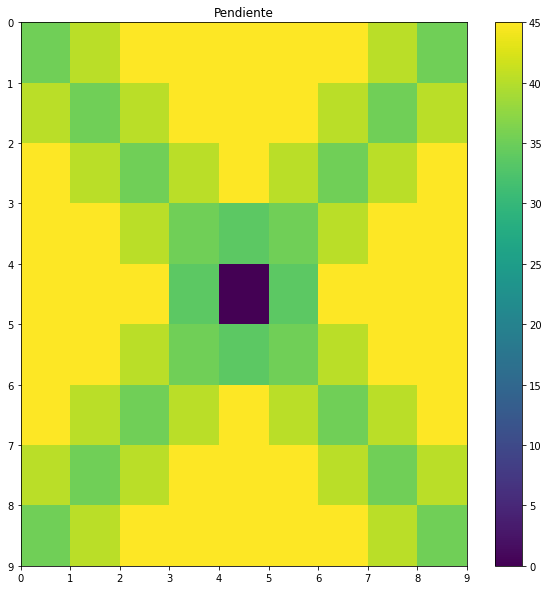

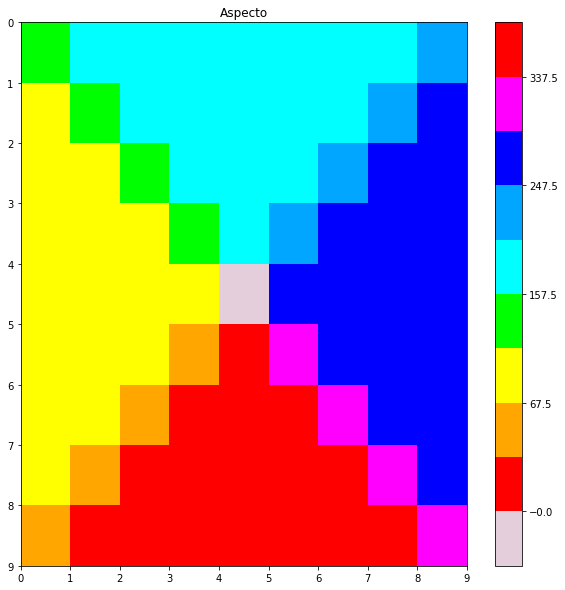

In [18]:
slope_test,aspect_test = get_slope_aspect(np.array(c, dtype=np.float64), 1)

plt.figure(figsize=(10, 10))
plt.pcolormesh(slope_test)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('Pendiente')
plt.show()

# Custom color bar
cmap = colors.ListedColormap(['#e5cedb', '#FF0000','#FFA600', '#FFFF00', '#00FF00', 
                              '#00FFFF', '#00A6FF','#0000FF', '#FF00FF', '#FF0000'])
# Custom color bar breaks
boundaries = [-1, -0.000001, 22.5, 67.5, 112.5, 157.5, 202.5, 247.5, 292.5, 337.5, 360.0]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

plt.figure(figsize=(10, 10))
plt.pcolormesh(aspect_test, cmap=cmap, norm=norm)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('Aspecto')
plt.show()

## Utilización del algoritmo sobre el GeoTiff

In [5]:
### Using the function in vector form 
slope,aspect = get_slope_aspect(np.array(arr, dtype=np.float64), 30)
# print('Slope:\n', np.round(slope, 2), '\n')
# print('Aspect:\n', np.round(aspect, 2), '\n')

### Using the function in a simple 'for loop' 
slope2,aspect2 = get_slope_aspect2(np.array(arr, dtype=np.float64), 30)
# print('Slope2:\n', np.round(slope2, 2), '\n')
# print('Aspect2:\n', np.round(aspect2, 2), '\n')

C:\Windows\Temp\ipykernel_15704\2870912681.py:24: RuntimeWarning: divide by zero encountered in true_divide
  A = np.arctan(np.abs(Q/P))   # A = np.round(A)   # print(A)
C:\Windows\Temp\ipykernel_15704\2870912681.py:24: RuntimeWarning: invalid value encountered in true_divide
  A = np.arctan(np.abs(Q/P))   # A = np.round(A)   # print(A)


--- 0.08489787975947062 min ---
--- 8.745294682184856 min ---


In [18]:
# Execution time get_slope_aspect vs get_slope_aspect2

# print('Check SLOPE:\n', slope==slope2, '\n')
# print('Check ASPECT:\n', aspect==aspect2, '\n')

print('Time vector_array:', 0.08779958089192709, 'min')
print('Time for_loop:', 8.1192218263944, 'min')
print('Ratio:', 8.1192218263944/0.08779958089192709, '\n')

Time vector_array: 0.08779958089192709 min
Time for_loop: 8.1192218263944 min
Ratio: 92.4744941139114 



## numpy.array ... to ... GeoTiff

In [15]:
# https://gist.github.com/jkatagi/a1207eee32463efd06fb57676dcf86c8
# https://gis.stackexchange.com/questions/198013/numpy-to-geotiff-for-use-with-gdal
# https://riptutorial.com/matplotlib/example/20692/custom-discrete-colormap
import matplotlib.colors as colors

# Aspect: Create a GeoTiff from array
upper_left_x, res_x, skew_x, upper_left_y, skew_y, res_y = dataset.GetGeoTransform()
drv = gdal.GetDriverByName("GTiff")
geoTiffAspect = drv.Create("new_aspect.tif", aspect.shape[1], aspect.shape[0], 1, gdal.GDT_Float32)
geoTiffAspect.SetProjection(dataset.GetProjection())
geoTiffAspect.SetGeoTransform((upper_left_x, res_x, skew_x, upper_left_y, skew_y, res_y))
geoTiffAspect.GetRasterBand(1).WriteArray(aspect)
geoTiffAspect.FlushCache()

# Slope: Create a GeoTiff from array
upper_left_x, res_x, skew_x, upper_left_y, skew_y, res_y = dataset.GetGeoTransform()
drv = gdal.GetDriverByName("GTiff")
geoTiffSlope = drv.Create("new_slope.tif", slope.shape[1], slope.shape[0], 1, gdal.GDT_Float32)
geoTiffSlope.SetProjection(dataset.GetProjection())
geoTiffSlope.SetGeoTransform((upper_left_x, res_x, skew_x, upper_left_y, skew_y, res_y))
geoTiffSlope.GetRasterBand(1).WriteArray(slope)
geoTiffSlope.FlushCache()



## Gráfica de la dirección azimutal

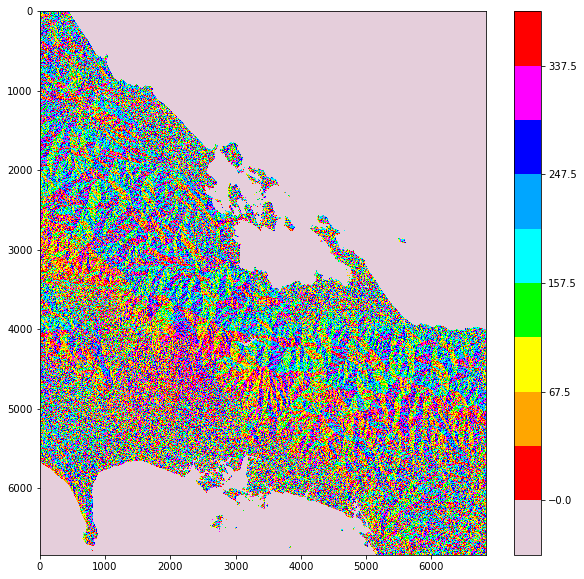

In [16]:
# Custom color bar
cmap = colors.ListedColormap(['#e5cedb', '#FF0000','#FFA600', '#FFFF00', '#00FF00', 
                              '#00FFFF', '#00A6FF','#0000FF', '#FF00FF', '#FF0000'])
# Custom color bar breaks
boundaries = [-1, -0.000001, 22.5, 67.5, 112.5, 157.5, 202.5, 247.5, 292.5, 337.5, 360.0]

norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

plt.figure(figsize=(10, 10))
plt.pcolormesh(aspect, cmap=cmap, norm=norm)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

## Gráfica de la pendiente

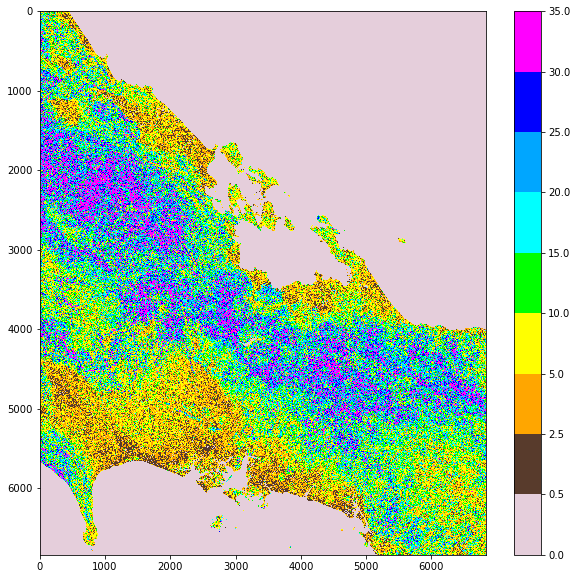

In [17]:
# Custom color bar
cmap = colors.ListedColormap(['#e5cedb', '#583B2C','#FFA600', '#FFFF00', '#00FF00', 
                              '#00FFFF', '#00A6FF','#0000FF', '#FF00FF'])
# Custom color bar breaks
boundaries = [0,0.5,2.5, 5, 10, 15, 20, 25, 30, 35]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

plt.figure(figsize=(10, 10))
plt.pcolormesh(slope, cmap=cmap, norm=norm)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

## Aplicaciones del cálculo de la pendiente y aspecto de una superifice en los métodos de interpolación
Los puntos azules sobre el mapa representan las estaciones meteorológicas que miden la precipitación.

In [5]:
Image(url="Picture5.png", width=500)

## Comparación entre el método de interpolación IDW vs REGNIE
Los triángulos y cuadrados sobre el mapa representan las estaciones meteorológicas que miden la temperatura.

In [5]:
Image(url="Picture6.png", width=900)

* El método de interpolación IDW (izquierda) solo considera las distancias horizontales entre los puntos, sin considerar las características físicas del terreno (latitud, longitud, elevación, etc.)

* El método de interpolación de REGNIE (derecha) considera variables geográficas adicionales con el fin de mejorar la estimación de las variables ambientales.